# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
#adding linearregression to the notebook
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [20]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [21]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [22]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [23]:
# 1) 5391 rows; 6 columns
print(f'The amount of rows in the data is: {data.shape[0]}, and the amount of columns is: {data.shape[1]}')
# 2) no NaN values
print(f'The data has any NaN values: {data.isna().values.any()}')
# 3) No duplicates
print(f'The data has duplicate rows: {data.duplicated().values.any()}')
duplicated_rows= data[data.duplicated()]
print(f'The amount of duplicates is: {len(duplicated_rows)}')
# 4) the column datatypes:
      #  #   Column                 Non-Null Count  Dtype
      # ---  ------                 --------------  -----
      #  0   Rank                   5391 non-null   int64
      #  1   Release_Date           5391 non-null   object
      #  2   Movie_Title            5391 non-null   object
      #  3   USD_Production_Budget  5391 non-null   object
      #  4   USD_Worldwide_Gross    5391 non-null   object
      #  5   USD_Domestic_Gross     5391 non-null   object
data.info()


The amount of rows in the data is: 5391, and the amount of columns is: 6
The data has any NaN values: False
The data has duplicate rows: False
The amount of duplicates is: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [24]:
chars_to_remove = ['$',',']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

#for every column in the array
for col in columns_to_clean:
  #for every character in the removal list
  for char in chars_to_remove:
    #replace the characters with an empty string
    char.replace('char',"")
    data[col] = data[col].astype(str).str.replace(char,"")
  #convert col to numeric datatype
  data[col] = pd.to_numeric(data[col])

In [25]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


Convert the `Release_Date` column to a Pandas Datetime type.

In [26]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [28]:
#confirm the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Questions**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [40]:
# What is the average production budget of the films in the data set?
print('The average production budget of the films in the data set is: $31,113,737.58.')
# What is the average worldwide gross revenue of films?
print('The average worldwide gross revenue of films is: $88,855,421.96')
# What were the minimums for worldwide and domestic revenue?
print('The minimums for worldwide revenue was: $0.00. \nThe minimum domestic revenue was: $0.00.')
# Are the bottom 25% of films actually profitable or do they lose money?
print('The bottom 25% of films were actually still profitable, by $3,865,206.00 worldwide and $1,330,901.50 domestic.')
# What are the highest production budget and highest worldwide gross revenue of any film?
print('The highest production budget was: $425,000,000.00. \nThe highest worldwide gross revenue of any film was: $2,783,918,982.00.')
# How much revenue did the lowest and highest budget films make?
  # data[data.USD_Production_Budget == 1100.00]
  # data[data.USD_Production_Budget == 425000000.00]
print(f'The revenue of the lowest budget film was: "My Date With Drew" earning $181,041. \nThe revenue of the highest budget film was: "Avatar" earning $2,783,918,982 worldwide and $760,507,625 domestic..')
#generate the analysis with one command:
data.describe()

The average production budget of the films in the data set is: $31,113,737.58.
The average worldwide gross revenue of films is: $88,855,421.96
The minimums for worldwide revenue was: $0.00. 
The minimum domestic revenue was: $0.00.
The bottom 25% of films were actually still profitable, by $3,865,206.00 worldwide and $1,330,901.50 domestic.
The highest production budget was: $425,000,000.00. 
The highest worldwide gross revenue of any film was: $2,783,918,982.00.
The revenue of the lowest budget film was: "My Date With Drew" earning $181,041. 
The revenue of the highest budget film was: "Avatar" earning $2,783,918,982 worldwide and $760,507,625 domestic..


,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


# Investigating the Zero Revenue Films

**Question** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [44]:
zero_domestic = data[data.USD_Domestic_Gross == 0.00] # 512 films grossed $0 domestically.
print(f"The number of films that grossed $0 domestically is: {zero_domestic.shape[0]}.")
print("The top fims that grossed $0 domestically were:")
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

The number of films that grossed $0 domestically is: 512.
The top fims that grossed $0 domestically were:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Question**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [46]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'The amount of films that grossed $0 worldwide is: {zero_worldwide.shape[0]}.')
print('The highest budget films that had no revenue internationally are:')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

The amount of films that grossed $0 worldwide is: 357.
The highest budget films that had no revenue internationally are:


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

**Question**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [52]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]
print(f'Number of international releases: {international_releases.shape[0]}.')
international_releases.head()

Number of international releases: 155.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [55]:
#achieving the same result with the .query() function
international_releases_query = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'The number of international releases is: {international_releases_query.shape[0]}.')
international_releases_query.head()

The number of international releases is: 155.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [64]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

#future releases are data where data.release data is above the scrape date
future_releases = data[data.Release_Date > scrape_date]
print(f'The amount of unreleased films from the dataset: {len(future_releases)}.')
future_film_names = '; '.join(future_releases.Movie_Title.tolist())
print(f'The films that were not yet screened in the box office were: {future_film_names}.')
data_clean = data.drop(future_releases.index)

The amount of unreleased films from the dataset: 7.
The films that were not yet screened in the box office were: A Wrinkle in Time; Amusement Park; Meg; Aquaman; Singularity; Hannibal the Conqueror; Story of Bonnie and Clyde, The.


In [65]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Question**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [70]:
money_pit_films = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
pct_money_pit = money_pit_films.shape[0]/data_clean.shape[0]
print(f'The percentage of films where the production costs exceeded the worldwide gross revenue is: {pct_money_pit}%.')

The percentage of films where the production costs exceeded the worldwide gross revenue is: 0.37277117384843983%.


# Seaborn for Data Viz: Bubble Charts

In [73]:
import seaborn as sns #also added to the top, but referenced here again for visual

### Plotting Movie Releases over Time



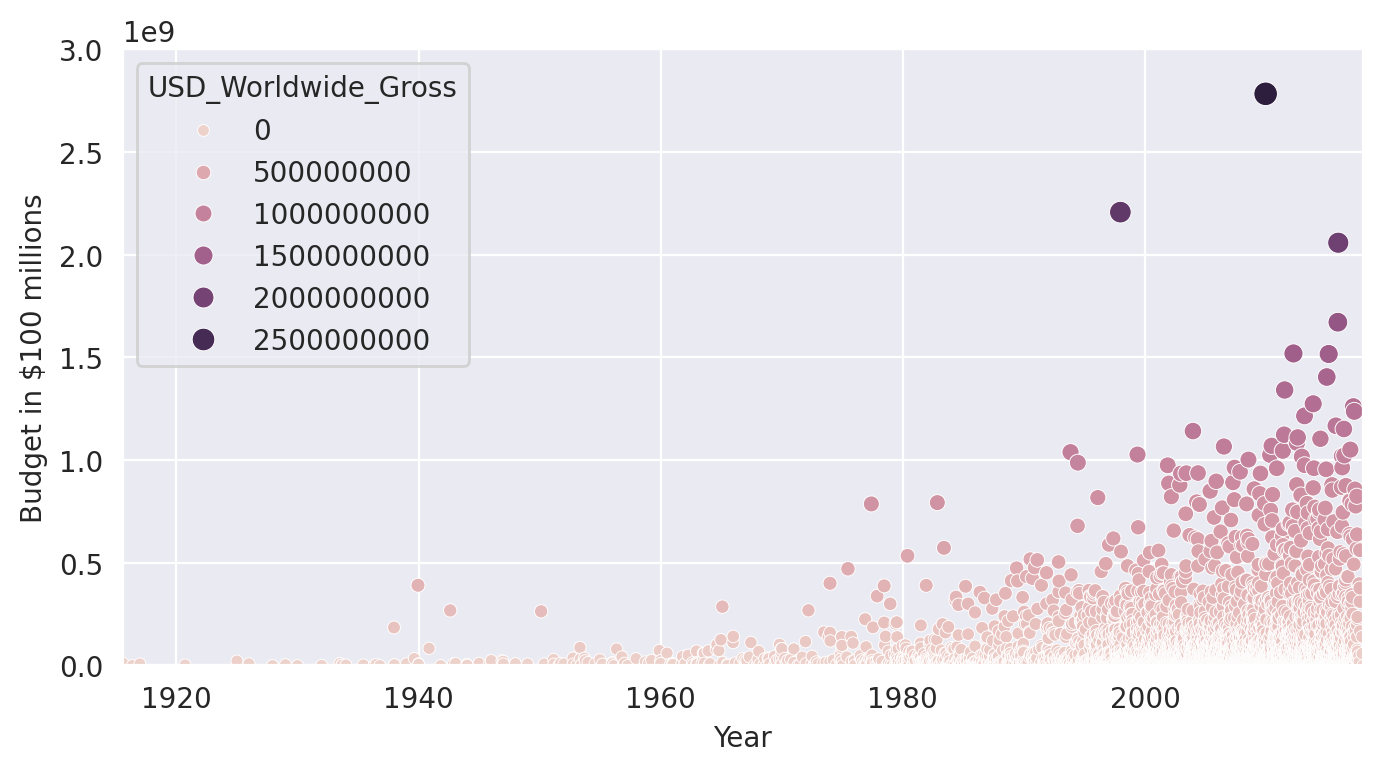

In [88]:
#adjusting the Matplotlib, since seaborn is built on top
plt.figure(figsize=(8,4), dpi=200)

#set the styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                  x='Release_Date',
                  y='USD_Worldwide_Gross',
                      #the highest grossing films will be larger and darker on our chart
                  hue='USD_Worldwide_Gross',
                  size='USD_Worldwide_Gross')

# configure the Axes object that's returned from sns.scatterplot()
ax.set(ylim=(0, 3000000000),
       xlim=(data_clean.Release_Date.min(),
             data_clean.Release_Date.max()),
       ylabel='Budget in $100 millions',
       xlabel='Year')

plt.show()

# Converting Years to Decades Trick

Creating a column in `data_clean` that has the decade of the release.

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [95]:
#call the DateTimeIndex constructor
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

#convert the years to decades.
# 1999//10 = 199 (drops remainder) * 10 = 1990
decades = years//10 *10
#create a new column in the data_clean df
data_clean['Decade'] = decades
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [101]:
old_films = data_clean.query('Decade <= 1960')
new_films = data_clean.query('Decade >= 1970')
print(f'The amount of films released prior to 1970 was {old_films.shape[0]}.')
old_films.sort_values('USD_Production_Budget', ascending=False).head()

The amount of films released prior to 1970 was 153.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

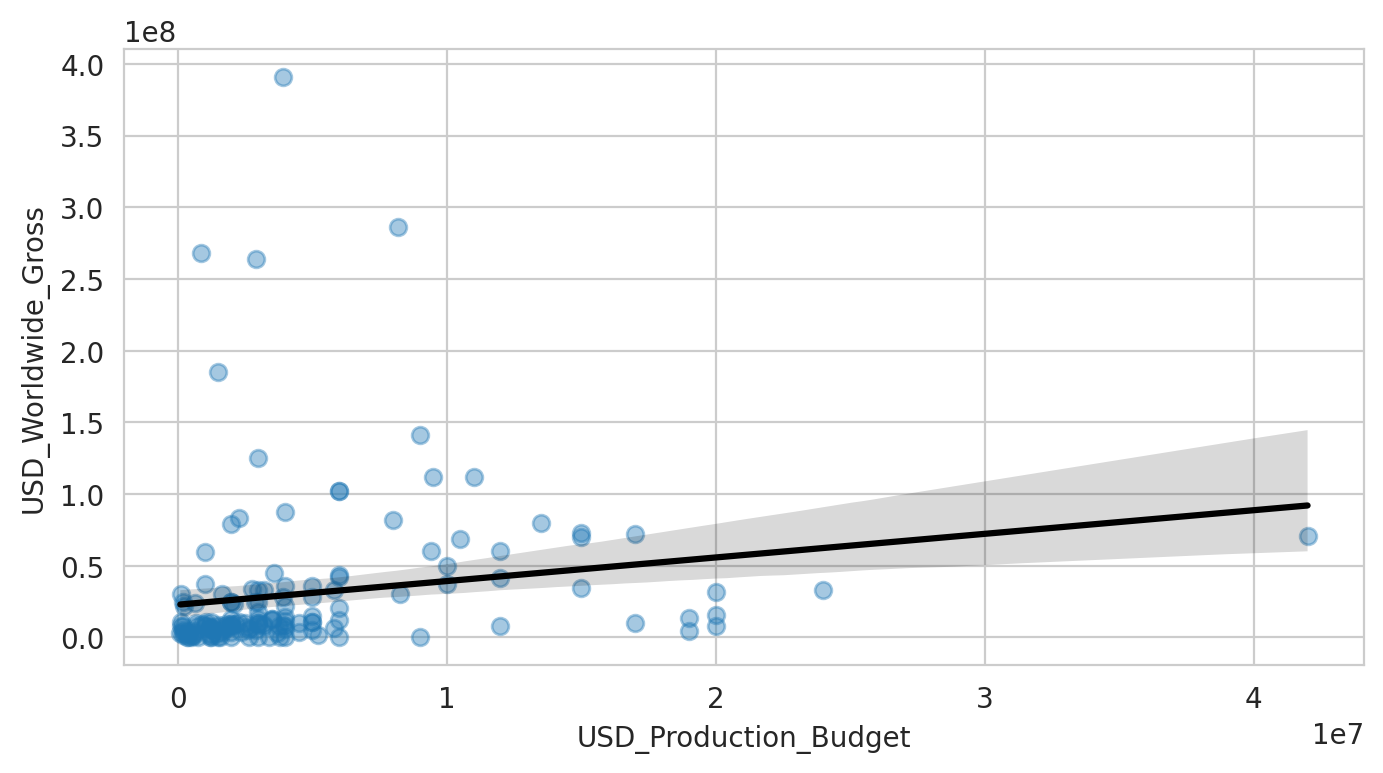

In [108]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})


Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

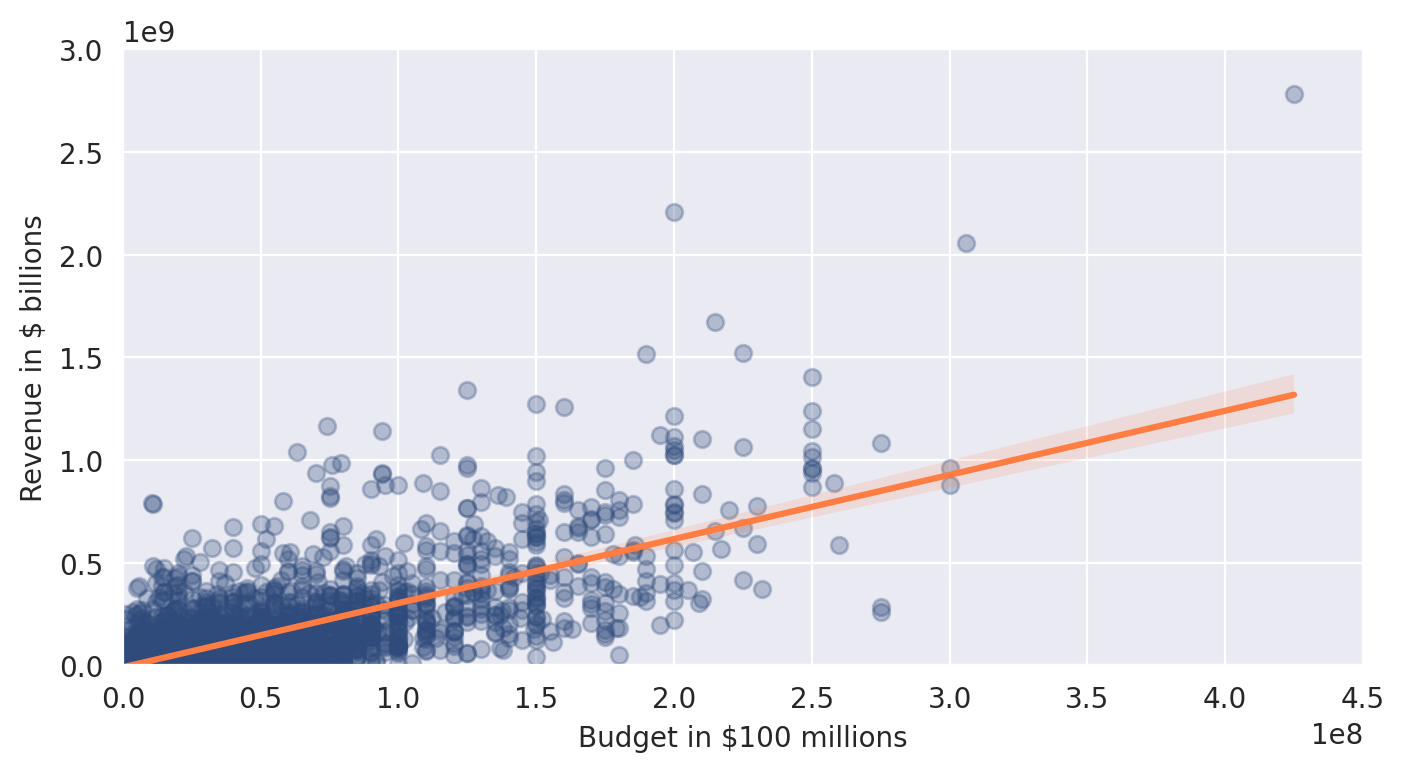

In [107]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

In [109]:
# Do our data points for the new films align better or worse with the linear regression than for our older films?
print('The data points for our new films align better than the old films in terms of budget to revenue conversion.\nThe way that this can be understood is via the slop of the line of regression and the accompanying spread of the films.')
# Roughly how much would a film with a budget of $150 million make according to the regression line?
print('According to the regression line illustrated above, a film with a budget of $150 million should in theory make slightly under $500 million in revenue. X-coord:1.5, y-coord:0.5')

The data points for our new films align better than the old films in terms of budget to revenue conversion.
The way that this can be understood is via the slop of the line of regression and the accompanying spread of the films.
According to the regression line illustrated above, a film with a budget of $150 million should in theory make slightly under $500 million in revenue. X-coord:1.5, y-coord:0.5


# Runing New Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
# #adding LinearRegression from scikit-learn
# from sklearn.linear_model import LinearRegression #added above

Running a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [111]:
regression = LinearRegression()

In [112]:
#features(X) and targets(y) specified

#creating DataFrames because LinearRegression does not like inputs of Pandas Series
#explanatory Variable(s) or feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

#response variable or target (this should be the worldwide gross target of the model)
y= pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

#find the best-fit line of regression
regression.fit(X,y)

LinearRegression()

In [113]:
#Theta Zero
regression.intercept_

array([-8650768.00661027])

In [114]:
#Theta One
regression.coef_

array([[3.12259592]])

In [115]:
#these values mean that if a budget for a movie is $0, the estimated revenue is Theta Zero
#Theta One represents the slope; i.e. for every $1 increment of budget, there is a 3.12259592 increase in revenue.
#the conclusion is that the higher the budget for a film, the higher the revenue, which would explain the explosion of budgets for films over the past few decades


In [118]:
# To test how well our model fits our data is by looking at a metric called r-squared. This is a good number to reference in addition to eyeballing the chart

# R-squared
regression.score(X,y)
#the return value is ~56%, meaning that with the one explanatory variable, we were able to explain up to 56% of the variance in movie revenue.
# So models with multiple variables could prove to be more accurate.

0.5577032617720403

Linear Regression for the old_films

In [123]:
# features(X) and targets(y) specified; creating DataFrames because LinearRegression does not like inputs of Pandas Series
oldfilm_regression = LinearRegression()
#explanatory Variable(s) or feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
#response variable or target (this should be the worldwide gross target of the model)
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

oldfilm_regression.fit(X,y)

print(f'The slope coefficient is: {oldfilm_regression.coef_[0]}')
print(f'The intercept is: {oldfilm_regression.intercept_[0]}')
print(f'The r-squared is: {oldfilm_regression.score(X,y)}')

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080386
The r-squared is: 0.02937258620576877


In [124]:
# these values mean that for old films, a $1 increase in budget should theoretically increase the revenue by $1.65.
# the additional budget for the films only had a ~3% accuracy when predicting increases in revenue.
# you can confirm this with the seaborn scatterplot associated with the old_films.

# Use Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Using the model**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [134]:
budget = 350000000
revenue_estimate = oldfilm_regression.intercept_[0] + oldfilm_regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a ${budget} film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350000000 film is around $600000000.0.
